In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.datasets import fashion_mnist
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


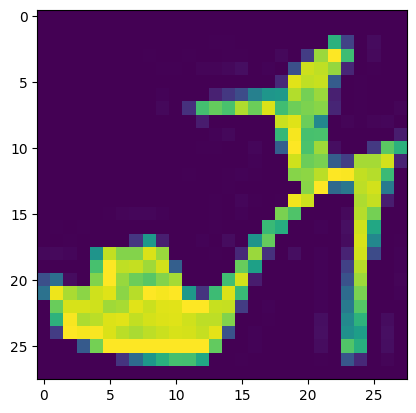

In [ ]:
plt.imshow(X_train[9])

In [ ]:
model = Sequential()
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding = "SAME")
model.add(DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(DefaultConv2D(filters=128))
model.add(DefaultConv2D(filters=128))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(DefaultConv2D(filters=256))
model.add(DefaultConv2D(filters=256))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

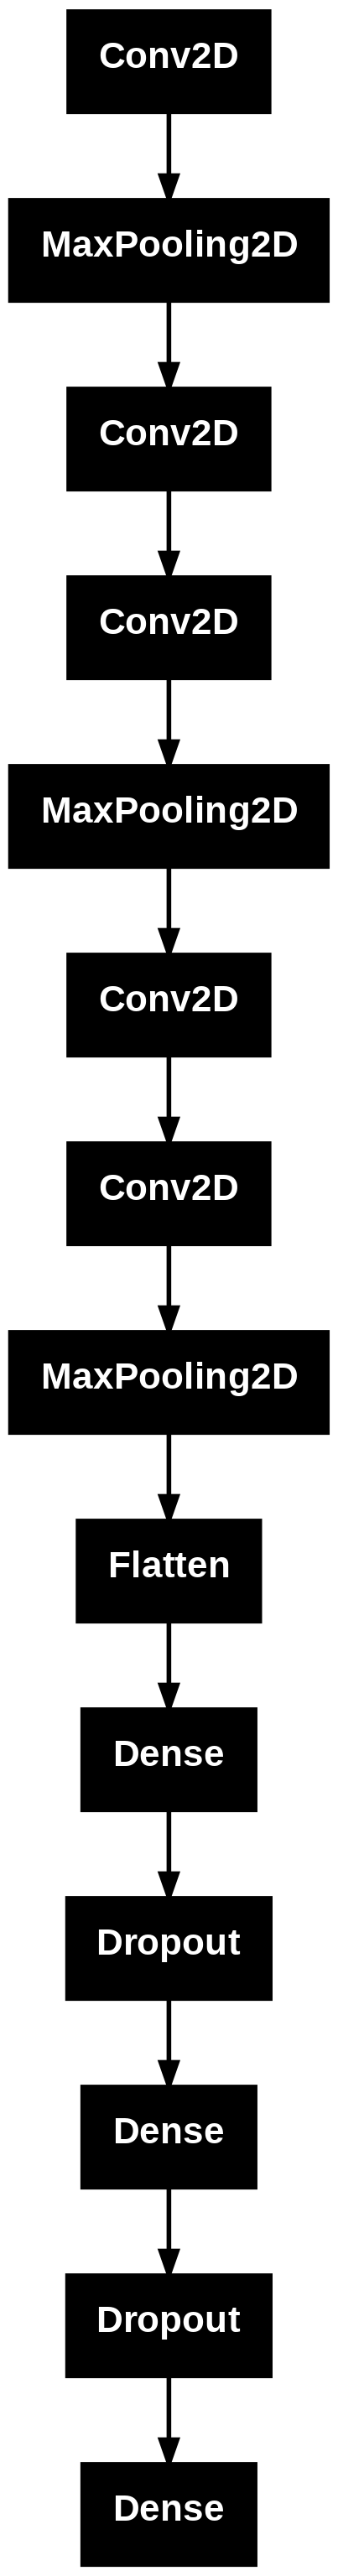

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=5)
history = model.fit(X_train, Y_train, epochs=10, validation_split = 0.2, callbacks = [es])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4978 - loss: 1.5336 - val_accuracy: 0.8358 - val_loss: 0.4796
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8181 - loss: 0.5258 - val_accuracy: 0.8601 - val_loss: 0.3878
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8411 - loss: 0.4661 - val_accuracy: 0.8685 - val_loss: 0.3550
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8546 - loss: 0.4236 - val_accuracy: 0.8711 - val_loss: 0.3395
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8634 - loss: 0.3911 - val_accuracy: 0.8808 - val_loss: 0.3347
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8648 - loss: 0.3891 - val_accuracy: 0.8807 - val_loss: 0.3288
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8710 - loss: 0.3718 - val_accuracy: 0.8748 - val_loss: 0.3479
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8723 - loss: 0

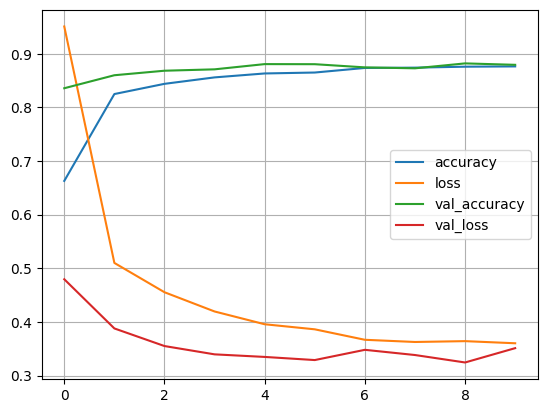

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)
proba_y = model.predict(X_test[:10])
pred_y = np.argmax(proba_y, axis=1)

print(pred_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8742 - loss: 0.3907
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
[9 2 1 1 6 1 4 6 5 7]
